In [ ]:
#사이킷런? -> '머신러닝 알고리즘을 간편하게 쓸수있게 만들어놓은' 라이브러리(함수 덩어리)
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
#sklearn의 데이터 중에 wine 데이터셋을 가져옴
data = datasets.load_wine()

#X => 다운로드 받은 와인 데이터셋의 '와인의 품종을 결정하는 여러가지 요소'
#y => 와인의 품종
#columns => 데이터의 프레임의 '열 이름', 와인의 품종을 결정하는 특징 이름
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['kine'])

#concat : 데이터 프레임을 '합치는것', axis=1은 열 방향으로 붙인다(옆)
df = pd.concat([X, y], axis=1)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,kine
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
len(data.feature_names)

13

In [ ]:
#군집화로 y를 쓰지 않고, 자기들끼리 묶어 본다.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#K(n_clusters)를 우리가 정해줘야 함
cluster = KMeans(n_clusters=3)
cluster.fit(X)

cluster_prediction = cluster.fit_predict(X)
print(cluster_prediction)

[0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 0 0 2 2 0 0 2 0 0 0 0 0 0 2 2
 0 0 2 2 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 2 1 2 1 1 2 1 1 2 2 2 1 1 0
 2 1 1 1 2 1 1 2 2 1 1 1 1 1 2 2 1 1 1 1 1 2 2 1 2 1 2 1 1 1 2 1 1 1 1 2 1
 1 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2
 2 1 1 1 1 2 2 2 1 2 2 2 1 2 1 2 2 1 2 2 2 2 1 1 2 2 2 2 2 1]


In [ ]:
# X 특징값들, 모델이 분류한 군집화 데이터
# 잘 군집화 했나? -> 실제값인 (y)를 넣지 않음(비지도 학습)
kmeans_s = silhouette_score(X, cluster_prediction)
print(f'실루엣 계수 : {kmeans_s}')

실루엣 계수 : 0.5711381937868838


- 군집화를 수행하기에 13개의 X 특징을 쓰는게 너무 많지 않을까? -> 특징의 개수를 줄이면 더 잘 분류하게 될까? ==> 차원축소를 쓴다.(X를 줄이는 것. 효율적인 X, 큰 특징을 가진 X만 남기는 것)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

In [ ]:
#정의
#하이퍼 파라미터(kind of 옵션...) : n_components
pca = PCA(n_components=5)

#훈련 fit(데이터를 알고리즘에 맞게 맞춰가는 과정)
#적용(예측) transform(데이터 변형)
pca_result = pca.fit_transform(X)

In [ ]:
#5차원으로 차원 축소된 데이터 결과를
#데이터 프레임화 하여 확인
pca_df = pd.DataFrame(pca_result)
pca_df.head()

,0,1,2,3,4
0,318.562979,21.492131,-3.130735,0.250114,-0.677078
1,303.097420,-5.364718,-6.822835,0.864035,0.486096
2,438.061133,-6.537309,1.113223,-0.912411,-0.380651
3,733.240139,0.192729,0.917257,0.541251,-0.858662
4,-11.571428,18.489995,0.554422,-1.360896,-0.276442


In [ ]:
#우리가 넣은 특징의 이름
pca.feature_names_in_

array(['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium',
       'total_phenols', 'flavanoids', 'nonflavanoid_phenols',
       'proanthocyanins', 'color_intensity', 'hue',
       'od280/od315_of_diluted_wines', 'proline'], dtype=object)

In [ ]:
#pca를 통해 13개의 특징 -> 5개 줄임
#이때, 각 특징이 전체 데이터의 몇 퍼센트를 설명하는지.
pca.explained_variance_ratio_

array([9.98091230e-01, 1.73591562e-03, 9.49589576e-05, 5.02173562e-05,
       1.23636847e-05])

In [ ]:
#하이퍼 파라미터(kind of 옵션...) : n_components => 데이터 X는 그대로
pca2 = PCA(n_components=2)
pca2_result = pca2.fit_transform(X)
print(pca2.explained_variance_ratio_)

[0.99809123 0.00173592]


In [ ]:
pca2_df = pd.DataFrame(pca2_result)
pca2_df.head()

,0,1
0,318.562979,21.492131
1,303.097420,-5.364718
2,438.061133,-6.537309
3,733.240139,0.192729
4,-11.571428,18.489995


In [ ]:
cluster_pca = KMeans(n_clusters=3)
cluster_pca.fit(pca2_df)

KMeans(n_clusters=3)

In [ ]:
#pca한 데이터를 넣고 실루엣 계수를 print
pca_predict = cluster_pca.fit_predict(pca2_df)
silhouette_pca = silhouette_score(pca2_df, pca_predict)
print(silhouette_pca)

0.5539729795626043


#T-SNE, ISOMAP

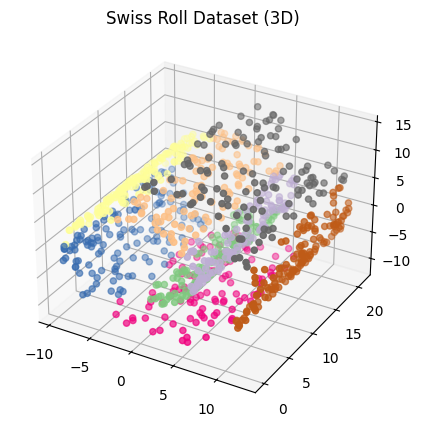

In [ ]:
from sklearn.datasets import make_swiss_roll
import matplotlib.pyplot as plt

#3차원 그래프를 그리는 모듈 -> Axes3D
from mpl_toolkits.mplot3d import Axes3D

X, color = make_swiss_roll(n_samples=1000, noise=0.1, random_state=25)
fig = plt.figure(figsize=(6,5))

#projection='3d' 3차원 그래프를 그리겠다고 선언
ax = fig.add_subplot(111, projection='3d')

#3축에 맞게, scatter(x[0], x[1], x[2])
#cmap = colormap -> 컬러 종류
ax.scatter(X[:,0], X[:,1], X[:,2], c=color, cmap='Accent')
ax.set_title("Swiss Roll Dataset (3D)")
plt.show()

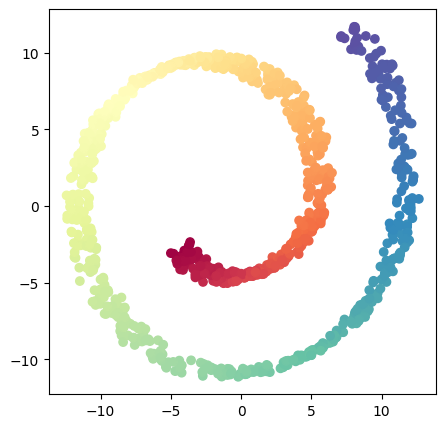

In [ ]:
#pca를 이 데이터셋에 사용! -> n_components가 2인 이유 -> 3차원 데이터를 2차원으로 만들거라서.
pca_roll = PCA(n_components=2)
X_pca = pca_roll.fit_transform(X)

#시각화
plt.figure(figsize=(5, 5))
#plt.scatter(x축 데이터, y축 데이터, c는 컬러)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=color, cmap='Spectral')
plt.show()

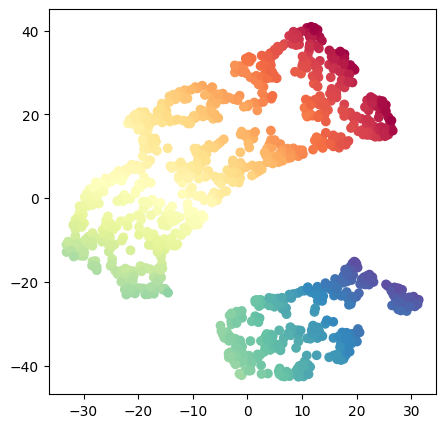

In [ ]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

#시각화
plt.figure(figsize=(5, 5))
#plt.scatter(x축 데이터, y축 데이터, c는 컬러)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap='Spectral')
plt.show()

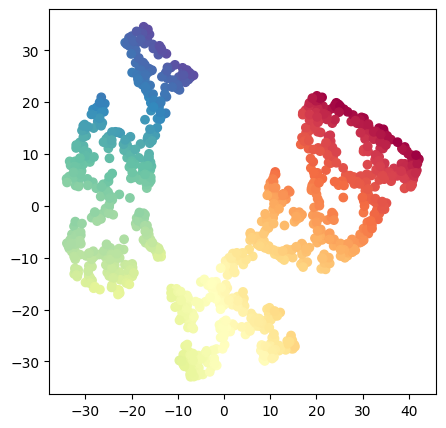

In [ ]:
#재연을 위해서 random_state
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

#시각화
plt.figure(figsize=(5, 5))
#plt.scatter(x축 데이터, y축 데이터, c는 컬러)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=color, cmap='Spectral')
plt.show()

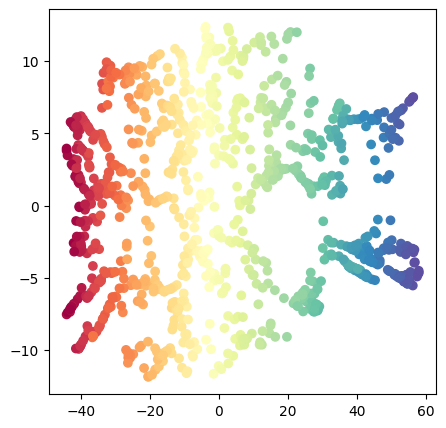

In [ ]:
#4분동안! ISOMAP을 적용해서(n_components=2) 시각화하시오.
iso = Isomap(n_components=2)
iso_x = iso.fit_transform(X)

#시각화
plt.figure(figsize=(5, 5))
#plt.scatter(x축 데이터, y축 데이터, c는 컬러)
plt.scatter(iso_x[:, 0], iso_x[:, 1], c=color, cmap='Spectral')
plt.show()